In [1]:
import numpy as np 
#numpy 모듈을 불러오는데 numpy모듈의 함수를 써서 코딩할때 numpy 대신 np로 쓰도록(numpy가 np보다 길기 때문에) 불러온다.

### 왜 넘파이를 사용하는가..?

* 1. 배열을 활용한 효율적인 계산.
* 2. scipy, matplotlib, pandas, scikit-learn, statsmodels 같은 라이브러리 간의 공통 인터페이스
* 3. Tensorflow 는 numpy의 ndarray 기능에 약간의 추가적인 기능 + 자동미분 + GPU지원 추가

#### Numpy의 효율성은?
* 1. 데이터 저장 방식!
* 2. 데이터 접근 방식!
* 3. 벡터화된 연산의 결과물!

#### 파이썬의 리스트 vs Numpy의 ndarray 비교

#### 파이썬의 리스트는 포인트를 담고 있다.
* 즉, 포인터의 배열이라서 객체가 메모리 여기저기에 흩어져 있다. 그러므로 캐시활용의 어려움이 있다. 

#### Numpy ndarray가 빠른 이유.
* ndarray는 타입을 명시하여 원소의 배열로 데이터를 유지 (여기저기 흩어져 있지 않음)
* 다차원 데이터도 연속된 공간이 할당됨
* 많은 연산이  strides**를 잘 활용하면 효율적으로 가능

#### strides란 리스트 슬라이싱할 때 자를 간격을 의미합니다. 
* ex) [start:end:stride] 인데 start 색인 부분 부터 시작하여, end 색인 바로 전 색인까지의 리스트를 잘라내며(slice), stride는 리스트에서 잘려진 요소들의 간격을 나타냅니다. 예를 들어 stride가 2라면, 잘려진 리스트 안에서 두 개의 색인 마다 저장된 값에 접근할 것입니다.

### * 파이썬의 리스트가 인덱싱하는 방법

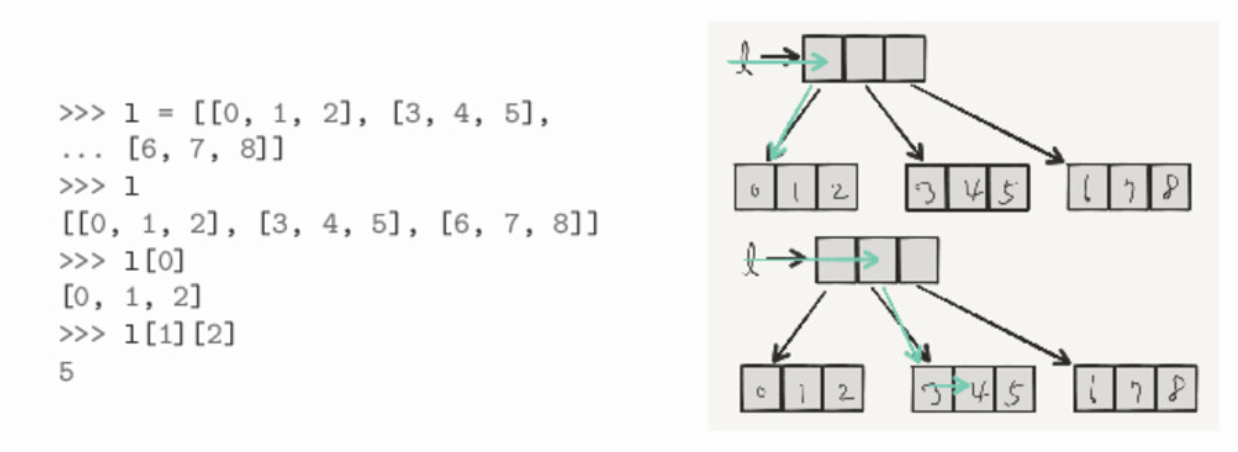

### * Numpy에서의 인덱싱하는 방법

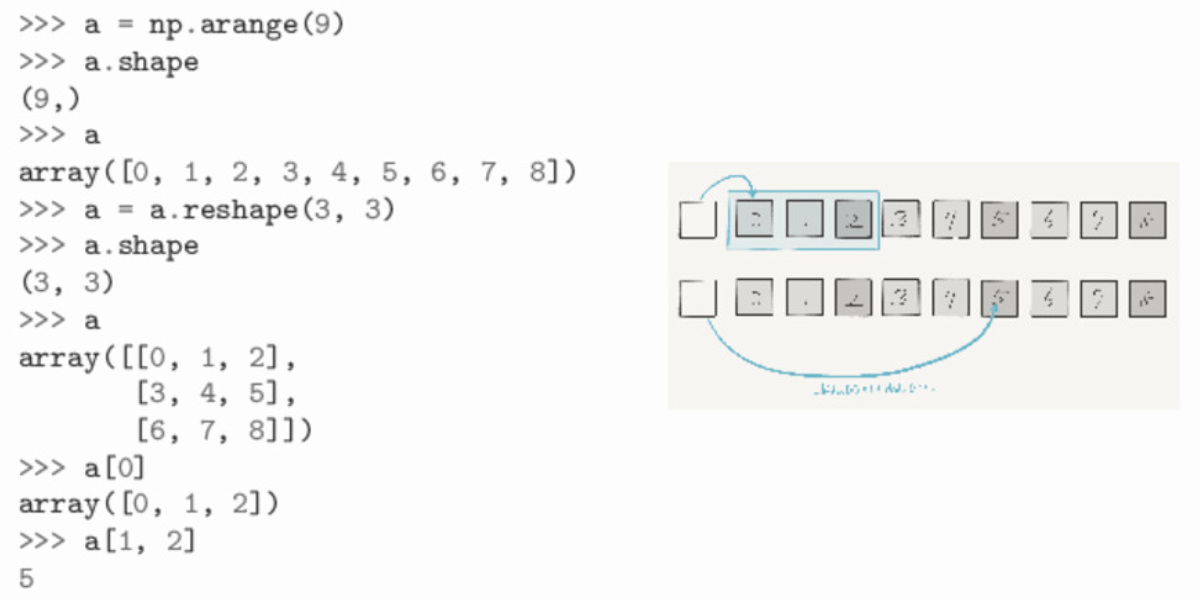

### 성능차이 비교

In [23]:
k = range(1000)

In [29]:
%timeit [i ** 2 for i in k]

403 µs ± 24.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [32]:
%timeit np.arange(1000) **2

3.5 µs ± 132 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### 같은 연산인데 속도차이가 나는 것을 확인할 수 있다.

 # 4. 1 NUMPY ndarray : 다차원 배열 객체

 ## 4.1.1 ndarray 생성
 
 ### 배열 생성 함수

 - np.arrary : 입력된 데이터를 ndarray로 변환. dtype을 명시하면 자료형을 설정할 수 있다.
 - np.asarray : 입력 데이터를 ndarray로 변환하나 이미 ndarray일 경우에는 새로 메모리에 ndarray가 생성되지는 않는다.
 - np.arrange : range 함수와 유사하나 ndarray를 반환한다. 자료형 Default는 float64이다.
 - np.ones : 전달인자로 전달한 dtype과 모양(행,렬)으로 배열을 생성하고 모든 내용을 1로 초기화하여 ndarray로 반환한다.
 - np.zeroes : ones와 같으나 초기값이 0이다.
 - np.empty : ones와 zeros와 비슷하나 값을 초기화하지 않는다.

## ndarray 다차원 배열 객체
* ndarray는 같은 종류의 데이터를 담을 수 있는 포괄적인 다차원 배열이다. ndarray의 모든 원소는 같은 자료형이어야만 한다.
- shape : 각 차원의 크기를 알려주는 튜플이다. (행,열)로 표시된다.

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('CTG.csv')

In [247]:
data.head(3) # .head(n) 는  n개만큼의 행을 보여주는 함수입니다.

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [4]:
data2=data[['CLASS','NSP']]  ## CLASS와 NSP 열을 가져옵니다.

In [5]:
data2=data2.dropna(axis=0) ## na가 포함된 행 제거.

In [6]:
data = np.array(data2) #numpy의 ndarray는 받은 데이터를 n차원 배열로 만드는 numpy 모듈의 함수이다.

In [258]:
data.shape # numpy의 shape는 해당 배열의 차원 구조, 형태를 알려준다

(2126, 2)

In [260]:
data.dtype # array는 생성될 때 적절한 자료형을 선택하는데 이 자료형은 dtype에 저장되어 언제든지 확인할 수 있다.

dtype('float64')

In [261]:
np.zeros((3,6)) # zeros 함수는 주어진 모양에 0이 들어있는 배열을 생성한다. ones의 경우 1이 들어있는 배열을 생성한다.

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [262]:
np.empty((2,3,2)) # empty함수는 초기화되지 않은 배열을 생성한다.

array([[[ 9.,  2.],
        [ 6.,  1.],
        [ 6.,  1.]],

       [[ 5.,  2.],
        [ 5.,  2.],
        [ 1.,  1.]]])

In [108]:
 np.arange(15) #arange 함수는 0부터 (입력된 숫자-1)까지의 배열을 생성한다.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [110]:
np.eye(4) #eye 함수는 단위 행렬을 생성한다. (identity 함수도 동일한 기능 수행)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

 ## 4.1.2 ndarray의 자료형

In [112]:
data.dtype

dtype('float64')

In [114]:
data.astype(np.int64) 
#astype함수를 이용하면 해당 배열의 자료형을 바꿀 수 있다. 이 경우 int64에서 float64로 바뀌는데 뒤의 숫자는 해당 숫자가 몇비트로 이루어지는지를 나타낸다.

array([[                   9,                    2],
       [                   6,                    1],
       [                   6,                    1],
       ..., 
       [-9223372036854775808, -9223372036854775808],
       [-9223372036854775808, -9223372036854775808],
       [-9223372036854775808, -9223372036854775808]], dtype=int64)

In [115]:
arr = np.array([3.7,-1.2, -2.6, 0.5, 12.9,10.1])

In [117]:
arr.astype(np.int32) # 소수형태의 배열을 정수형으로 반환하면 소수점 아랫자리는 버려진다.

array([ 3, -1, -2,  0, 12, 10])

In [118]:
numeric_strings = np.array(['1.25','-9.6','42'], dtype = np.string_) # array를 설정할 때부터 dtype을 통해 형태를 지정할 수 있다.

In [119]:
numeric_strings

array([b'1.25', b'-9.6', b'42'],
      dtype='|S4')

## 4.1.3 배열과 스칼라 간의 연산

In [263]:
data*data # 배열의 연산은 사칙연산의 기호를 그대로 사용하면 된다.

array([[ 81.,   4.],
       [ 36.,   1.],
       [ 36.,   1.],
       ..., 
       [ 25.,   4.],
       [ 25.,   4.],
       [  1.,   1.]])

In [264]:
1/data # 배열의 연산은 각 요소에 모두 전달된다.

array([[ 0.11111111,  0.5       ],
       [ 0.16666667,  1.        ],
       [ 0.16666667,  1.        ],
       ..., 
       [ 0.2       ,  0.5       ],
       [ 0.2       ,  0.5       ],
       [ 1.        ,  1.        ]])

#### 크기가 다른 배열 간이 연산은 브로드캐스팅(BroadCasting)이라고 한다. 나중에 딥러닝의 기본적인 개념을 이해할 때 나오는 개념이므로 숙지해야 한다!


## 4.1.4 색인과 슬라이싱 기초

In [130]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [131]:
arr[5]

5

In [125]:
In [23]: arr[5:8] # 1차원 배열의 인덱싱은 파이썬의 리스트와 유사하게 동작한다.

array([5, 6, 7])

In [133]:
arr[5:8] = 100
# 배열과 리스트의 차이는 리스트에서는 인덱싱 값을 수정하면 원본 리스트에 반영되지 않지만 배열의 인덱싱 값을 수정하면 원본 배열에 반영된다는 점이다.
arr

array([  0,   1,   2,   3,   4, 100, 100, 100,   8,   9])

In [134]:
li = list(range(10))

In [135]:
li

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [136]:
li[5:8]

[5, 6, 7]

In [138]:
li[5:8] = 100

TypeError: can only assign an iterable

Numpy 배열은 슬라이싱에 100이라는 값이 한 번에 다중할당 됐지만, 파이썬 리스트의 경우에는 불가능했다. for문을 이용해서 각 색인(index)별로 꺼내서 할당해야 한다.
또 큰차이점은 NumPy 배열이 새로운 값을 슬라이싱 했을 때, 할당하면서 할당된 배열이 새롭게 생성되어 반환되는 것이 아니라 기존 배열의 값을 수정한다는 것이다. 데이터 값이 복사되어 새롭게 배열이 생성되는 것이 아닌 것이다. 즉 대용량 데이터 처리를 할 때 이점이 있는 부분이다.

In [141]:
arr_slice = arr[5:8]

In [145]:
arr_slice

array([64, 64, 64])

In [146]:
arr_slice[0] = 12345 #arr_slice에서 0번째에 해당하는 값을 12345로 바꾼다.

In [147]:
arr

array([    0,     1,     2,     3,     4, 12345,    64,    64,     8,     9])

In [148]:
arr_slice[:] = 64 # arr_slice에 해당하는 모든 인덱스 값을 64로 바꾼다.

In [149]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

#### numpy에서는 슬라이싱된 배열을 이용하면 복사를 해서 처리하는 것이 아닌 원본 배열을 그대로 이용한다. 
#### 이는 numpy가 대용량 데이터 처리를 위해 메모리를 절약하도록 설계되었기 때문이다.

In [150]:
arr =  np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

.copy를 이용하면 새로 배열이 생성되어 반환된다.

In [151]:
arr_slice = arr[5:8].copy()

In [152]:
arr_slice

array([5, 6, 7])

In [153]:
arr_slice[:] = 127
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [154]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [155]:
arr2d[0] # 2차원 배열에서 배열의 색인은 값이 아닌, 1차원 배열이다.

array([1, 2, 3])

In [156]:
arr2d[0][2] # 2차원 이상의 배열에서 스칼라 값을 출력하고 싶을 때는 이런 식으로 접근하면 된다.

3

In [157]:
arr2d[0,2] # 위와 같은 결과값을 반환

3

In [168]:
data[0]

array([ 9.,  2.])

In [169]:
data[0] = 42 # 배열값에 숫자를 할당하면 배열의 모든 숫자가 할당한 값으로 변한다

In [172]:
data[0]

array([ 42.,  42.])

In [173]:
data[0:2]

array([[ 42.,  42.],
       [  6.,   1.]])

In [176]:
data[:2]  # 0과 1 index 출력.
# 슬라이싱의 경우 [1:5]로 입력하면 해당 배열의 두번째값부터 다섯번째값을 출력하게 된다. 파이썬의 경우 배열이나 리스트의 첫번째 값은 0에 있다고 보기 때문이다. 시작값을 입력하지 않으면 자동으로 첫번째 값부터 슬라이싱하며, 끝값을 입력하지 않으면 자동으로 마지막번째 값까지 슬라이싱하게 된다.

array([[ 42.,  42.],
       [  6.,   1.]])

In [178]:
data[:2, 1:] 
#다차원 구조의 경우 여러번의 슬라이싱을 통해 원하는 값을 출력할 수 있다. 하지만 이렇게 슬라이싱 할 경우 항상 원래 배열 구조 형태로 출력값을 보여주게 된다.

array([[ 42.],
       [  1.]])

In [179]:
data[1,:2] # 정수 색인과 슬라이스를 함께 이용하면 한 차원 낮아지는 슬라이스를 볼 수 있다.

array([ 6.,  1.])

In [180]:
data[1][:2] # 이 또한 같은 표현이다.

array([ 6.,  1.])

# 4.3 배열을 사용한 데이터 처리

* NumPy 배열을 사용하면 반복문을 작성하지 않고 간결한 배열연산을 통해 데이터 처리 작업이 가능
* <벡터화> : 배열연산을 사용해 반복문을 명시적으로 제거하는 방법
* 일반적으로 벡터화 된 배열에 대해 산술연산을 순수 파이썬 연산에 비해 빠름

## 4.3.1 배열 연산으로 조건절 표현하기

In [288]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

result = np.where(cond, xarr, yarr) # Cond가 True이면 xarr에서, False이면 yarr에서 값을 취함
print (result)

[ 1.1  2.2  1.3  1.4  2.5]


In [289]:
arr = np.random.randn(4, 4)
print (arr)

[[-0.11524917 -0.61463054 -0.03478197 -0.78846751]
 [ 1.11747416 -1.75708291  0.53361066  0.16936027]
 [-0.18983576 -0.29077841  1.0269487   0.47664465]
 [-0.58572872 -0.50428051 -0.1337497   0.23965906]]


In [290]:
print (np.where(arr > 0, 2, -2)) # arr > 0 이 True이면 2, False이면 -2를 취함.

[[-2 -2 -2 -2]
 [ 2 -2  2  2]
 [-2 -2  2  2]
 [-2 -2 -2  2]]


In [291]:
print (np.where(arr > 0, 2, arr)) #arr > 0 이 True이면 2, False이면 arr의 값을 취함.

[[-0.11524917 -0.61463054 -0.03478197 -0.78846751]
 [ 2.         -1.75708291  2.          2.        ]
 [-0.18983576 -0.29077841  2.          2.        ]
 [-0.58572872 -0.50428051 -0.1337497   2.        ]]


## 4.3.2 수학 메서드와 통계 메서드

In [7]:
arr = np.random.randn(5, 4) #5행 4열의 배열(5x4행렬) 생성
arr

array([[-0.7585437 , -1.19256151, -0.62416103,  0.66917998],
       [ 0.19549565,  0.95133422,  0.95863723, -0.52637936],
       [ 2.05237288, -1.84731557,  1.4230622 , -1.49361286],
       [-0.66041692, -0.24089588, -1.04332015,  0.89211648],
       [ 0.68817837,  0.54047671,  1.40152775,  0.60306799]])

In [74]:
print (arr.mean()) #전체 원소들의 평균값을 구함.

0.275763967291


In [75]:
print (np.mean(arr)) #전체 원소들의 평균값을 구함.

0.275763967291


In [76]:
print (arr.sum()) #전체 원소들의 합을 구함.

5.51527934583


#### mean이나 sum 같은 함수는 선택적으로 axis인자를 받아 해당 axis에 대한 통계를 계산하고 한 차수 낮은 배열 반환

In [8]:
print (arr.mean(axis = 1))

[-0.47652156  0.39477194  0.03362666 -0.26312912  0.80831271]


In [11]:
print (arr.sum(0))

[ 1.51708628 -1.78896204  2.115746    0.14437224]


#### cumsum과 cumprod 매서드는 중간 계산 값을 담고 있는 배열을 반환.

In [129]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]]) # 같은 column 끼리의 누적 합을 구함. 
print (arr.cumsum(0)) 

[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]


In [131]:
print (arr.cumprod(1)) # 같은 row끼리의 누적 곱을 구함. 

[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


## 4.3.4 정렬

In [91]:
arr = np.random.randn(8)
arr

array([ 0.4630981 , -0.88243394,  1.09615745, -0.96343129,  1.44333664,
        0.14575168, -0.51604767,  0.69079198])

In [92]:
arr.sort() #다차원 배열의 정렬은 sort 메서드에 넘긴 축의 값에 따라 1차원 부분 정렬(오름차순)

In [93]:
arr

array([-0.96343129, -0.88243394, -0.51604767,  0.14575168,  0.4630981 ,
        0.69079198,  1.09615745,  1.44333664])

In [94]:
arr = np.random.randn(5, 3) #5행 3열의 배열(5x3행렬) arr 생성
arr

array([[ 0.97878464,  0.21929454,  1.97584621],
       [ 0.78401573, -0.43165067, -1.15774644],
       [-1.27508584,  0.5632751 , -1.32966949],
       [-0.69490729,  0.21344635, -0.98822966],
       [ 0.02739974, -0.54268513, -0.09285041]])

In [95]:
arr.sort(1) #row.sort 각 행의 원소들을 오름차순으로 정렬
arr

array([[ 0.21929454,  0.97878464,  1.97584621],
       [-1.15774644, -0.43165067,  0.78401573],
       [-1.32966949, -1.27508584,  0.5632751 ],
       [-0.98822966, -0.69490729,  0.21344635],
       [-0.54268513, -0.09285041,  0.02739974]])

In [96]:
arr.sort(0) #column.sort 각 열의 원소들을 오름차순으로 정렬
arr

array([[-1.32966949, -1.27508584,  0.02739974],
       [-1.15774644, -0.69490729,  0.21344635],
       [-0.98822966, -0.43165067,  0.5632751 ],
       [-0.54268513, -0.09285041,  0.78401573],
       [ 0.21929454,  0.97878464,  1.97584621]])

#### np.sort 매서드는 배열을 직접 변경하지 않고 정렬된 결과를 가지고 있는 복사본을 반환한다.
#### 배열의 분위수를 구하는 방법은 우선 배열을 정렬한 후 특정 분위의 값을 선택하는 것이다.

## 4.3.5 집합 함수

In [3]:
names = np.array(['진모', '정민', '유성'])
names

array(['진모', '정민', '유성'], dtype='<U2')

In [4]:
np.unique(names) #배열 내에 같은 이름이 중복되어 있다면 중복을 제거한 다음 불러온다.(가장 자주 사용될 수 있다.)

array(['유성', '정민', '진모'], dtype='<U2')

In [5]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
ints

array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [6]:
np.unique(ints)

array([1, 2, 3, 4])

In [7]:
sorted(set(names)) # np.unique를 순수 파이썬으로 구현 한 것

['유성', '정민', '진모']

### Numpy에서 사용되는 배열 집합 함수 정리
#### Method	                       Comment
- unique(x)	        배열 x에서 중복된 원소를 제거한 후 정렬하여 반환한다.
- intersect1d(x, y)	배열 x와 y에 공통적으로 존재하는 원소를 정렬하여 반환한다.
- union1d(x, y)	    두 배열의 합집합을 반환한다.
- in1d(x, y)	    x의 원소 중 y의 원소를 포함하는지를 나타내는 불리언 배열을 반환한다.
- setdiff1d(x, y)	x와 y의 차집합을 반환한다.
- setxor1d(x, y)	한 배열에는 포함되지만 두 배열 모두에는 포함되지 않는 원소들의 집합인 대칭차집합을 반환한다.

# 4.4 배열의 파일 입·출력

#### NumPy는 디스크에서 텍스트나 바이너리 형식의 파일로부터 데이터를 불러오거나 저장하는 것이 가능하다.

## 4.4.1 배열을 바이너리 형식으로 디스크에 저장하기 

In [8]:
import os
os.getcwd()

'C:\\Users\\wlsah\\Desktop\\기계학습\\발표'

In [304]:
# 배열은 기본적으로 압축되지 않은 raw 바이너리 형식의 '.npy'파일로 저장됨.
np.save('some_array', data)

In [305]:
np.load('some_array.npy') #'.npy'파일로 저장된 배열은 np.load로 불러올 수 있다.

array([[ 9.,  2.],
       [ 6.,  1.],
       [ 6.,  1.],
       ..., 
       [ 5.,  2.],
       [ 5.,  2.],
       [ 1.,  1.]])

In [120]:
np.savez('array_archive.npz', a=data, b=data) 
#np.savez는 여러 개의 배열을 압축된 형식으로 저장 가능하다. (저장하려는 배열은 키워드 인자 형태로 전달된다.)

In [122]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [121]:
arch = np.load('array_archive.npz')

In [191]:
arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [193]:
a =np.random.randn(10)
a

array([-0.14701515, -1.39248973, -0.02780587, -0.88433893, -0.72200169,
        0.46671162,  0.37917249,  1.09919546,  1.07151136,  0.27116316])

### np.loadtxt('~.txt', delimiter=',' ) 를 사용하면 텍스트 파일 불러오기와 저장할 수 있습니다.

# 4.5 선형대수 

In [15]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [16]:
x

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [17]:
y

array([[  6.,  23.],
       [ -1.,   7.],
       [  8.,   9.]])

In [18]:
x.dot(y) #행렬의 곱. * 기호는 단순히 원소끼리의 곱

array([[  28.,   64.],
       [  67.,  181.]])

In [19]:
np.dot(x,y) #x.dot(y)와 결과 동일

array([[  28.,   64.],
       [  67.,  181.]])

In [ ]:
from numpy.linalg import inv, qr

In [ ]:
#numpy.linalg : 행렬의 분할, 역행렬, 행렬식 등 포함

In [ ]:
from numpy.random import randn

In [ ]:
X=randn(5,5)

In [ ]:
mat = X.T.dot(X) 

In [ ]:
inv(mat) #mat의 역행렬

In [ ]:
mat.dot(inv(mat)) # 자기 자신과 역행렬의 곱

In [ ]:
q,r = qr(mat) #qr분해

In [ ]:
r

### 자주 사용되는 numpy.linalg functions
- diag : 정사각 행렬의 대각/비대각 원소를 1차원 배열로 반환하거나 1차원 배열을 대각선 원소로 하고, 나머지는 0으로 채운 단위 행렬을 반환한다.
- dot : 행렬곱셈
- trace : 행렬의 대각선 원소의 합 계산
- det : 행렬식 계산
- eig : 정사각 행렬의 고유값과 고유벡터를 계산
- inv : 정사각 행렬의 역행렬 계산
- pinv : 행렬의 무어-벨로즈 유사역원 역행렬을 구한다
- qr : QR 분해 계산
- svd : 특이값 분해(SVD)를 계산
- solve : A가 정사각 행렬일 때, Ax= b를 만족하는 x 구하기
- lstsq : y=xb를 만족하는 최소제곱해를 구함

# 4.6 난수 생성

In [131]:
samples = np.random.normal(size=(4,4)) #normal 써서 표준정규분포로 4*4 크기 표본 생성

samples

array([[-0.85765726,  1.07305165, -0.60636152,  0.43346736],
       [ 0.16832066,  0.72883593,  0.66248078, -0.65622524],
       [ 1.97994768, -0.79904813, -0.35904651, -0.36789614],
       [-0.3223326 ,  0.37283414,  0.82584998,  1.82634251]])

In [132]:
#numpy.random : 파이썬 내장 random 함수 보강-> 다양한 종류 확률분포로부터 표본값 생성

In [133]:
from random import normalvariate

In [134]:
N=1000000

In [135]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1 loop, best of 3: 1.14 s per loop


In [136]:
## 파이썬 기본 모듈을 이용해서표준정규분포를 따르는 랜덤한 백만개의 값 생성

In [137]:
%timeit np.random.normal(size=N)

10 loops, best of 3: 42 ms per loop


In [12]:
arr = np.arange(20).reshape(4,5)